**Research Questions**

1. 

2. 

3. 

In [257]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [258]:
X = pd.read_csv("data/train/features.csv")
Y = pd.read_csv("data/train/labels.csv")

In [259]:
df = pd.concat([X,Y], axis=1)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,60739,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,27263,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,37057,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,31282,functional


# Duplicates

In [260]:
df[df.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group


# Outliers and bad data

<AxesSubplot: xlabel='amount_tsh', ylabel='Density'>

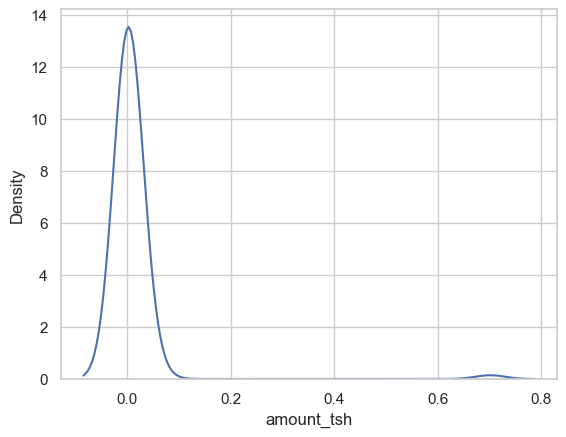

In [261]:

sns.kdeplot(data=df['amount_tsh'].value_counts(normalize=True))

| Column | Description | Cleaning needed? |
| --- | --- | --- |
| id | Pump ID | Missing ID values, max ID exceeds number of entries. Best to disregard ID and use own IDs |
| amount_tsh | Total Static Head (water available to pump) | 70% of values are 0 - column can potentially be dropped |
| date_recorded | Date row was entered | Some potential outlier values with recorded dates much earlier than others - these could likely be replaced with median value |
| funder | Who funded the well | Some missing values, some non-matching entries (ie. "Government of Tanzania" and "Government/ Community"). |
| num_private | Unclear | 98.7% of data is 0, column can be safely dropped |

# Missing values

In [324]:
%matplotlib qt

missing_counts = df.isnull().sum()
missing_proportions = missing_counts/len(df)*100

missing_proportions = missing_proportions.drop(index=missing_proportions[missing_proportions == 0].index)

sns.set(rc={'figure.figsize':(7,2)})
sns.barplot(y=missing_proportions.index, x=missing_proportions.values)
plt.title("Percentage of missing values by column")

Text(0.5, 1.0, 'Percentage of missing values by column')

2023-03-05 19:48:42.206 python[61464:16177280] +[CATransaction synchronize] called within transaction
2023-03-05 19:48:46.131 python[61464:16177280] +[CATransaction synchronize] called within transaction
2023-03-05 19:48:47.314 python[61464:16177280] +[CATransaction synchronize] called within transaction
2023-03-05 19:48:47.577 python[61464:16177280] +[CATransaction synchronize] called within transaction


# Zero values

In [325]:
# Calculate the percentage of values equal to the mode for each column
percentages = {}
for column in df.select_dtypes(include=['int64', 'float64']).columns[1:-1]:
    zero_count = (df[column] == 0).sum()
    total_count = df[column].count()
    percentage = zero_count / total_count * 100
    if percentage > 0:
        percentages[column] = percentage

# Print the result
sns.set(rc={'figure.figsize':(7,2)})
sns.barplot(y=list(percentages.keys()), x=list(percentages.values()))
plt.title("Percentage of values equal to zero by column")

Text(0.5, 1.0, 'Percentage of values equal to zero by column')

2023-03-05 19:48:55.252 python[61464:16177280] +[CATransaction synchronize] called within transaction
2023-03-05 19:49:00.039 python[61464:16177280] +[CATransaction synchronize] called within transaction
2023-03-05 19:49:00.973 python[61464:16177280] +[CATransaction synchronize] called within transaction
2023-03-05 19:49:01.237 python[61464:16177280] +[CATransaction synchronize] called within transaction


# Outliers

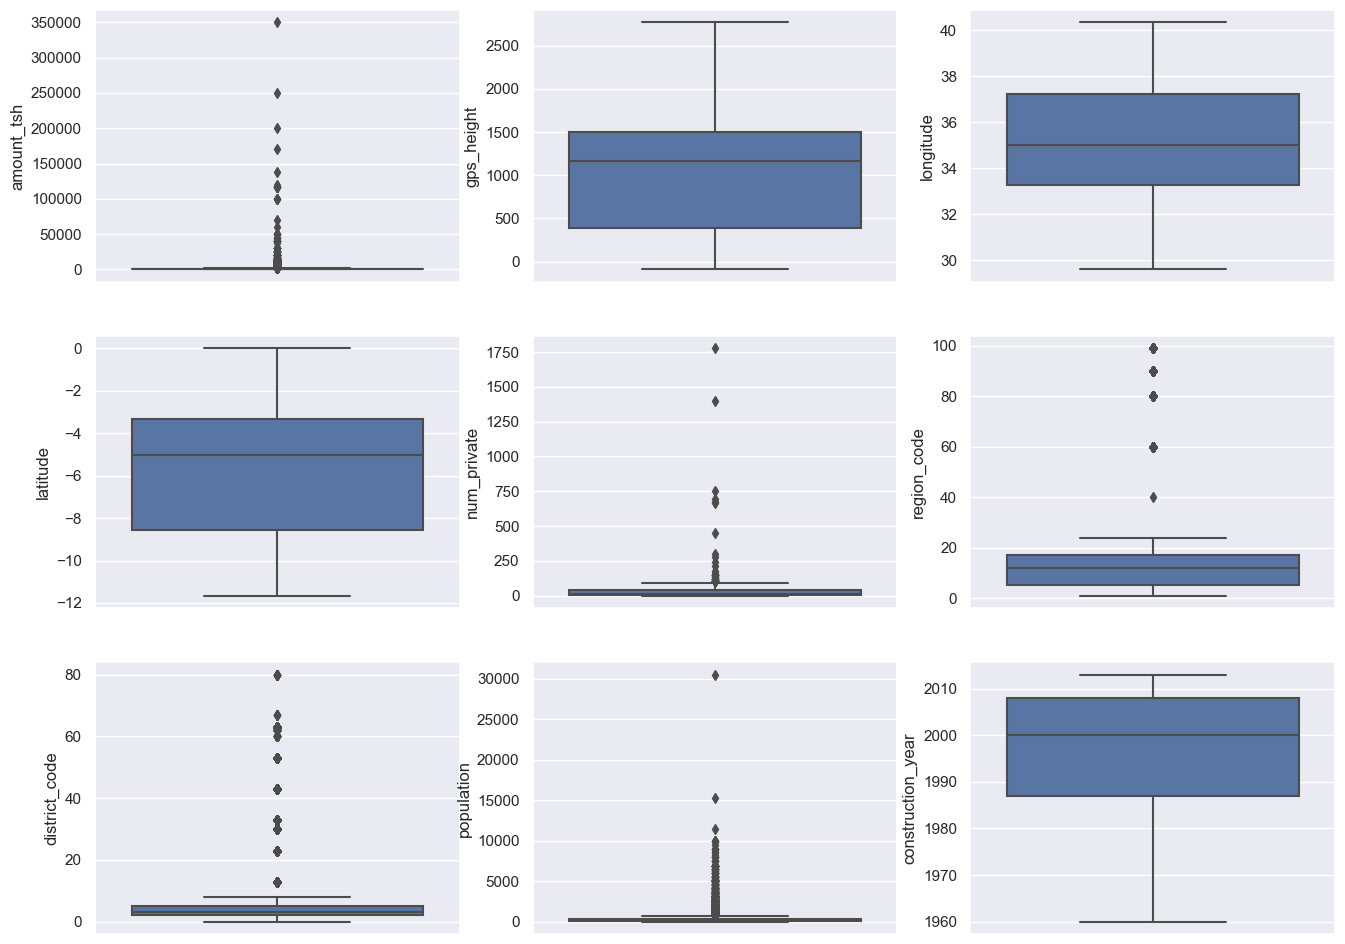

In [294]:
fig, axs = plt.subplots(3,3, figsize=(16, 12))

for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns[1:-1]):

    y = df[column]

    # print(i, column)

    if column in list(percentages.keys()):
        # print('1:',len(y))
        y = df.loc[df[column] != 0, column]
        # print('2:',len(y))
    if column in list(missing_proportions.index):
        # print('3:',len(y))
        y = df.loc[df[column].notnull(), column]
        # print('4:',len(y))

    # print(y.describe())

    # Add boxplot
    sns.boxplot(ax=axs[i//3, i%3], y=y)

plt.show()

<AxesSubplot: xlabel='year', ylabel='proportion'>

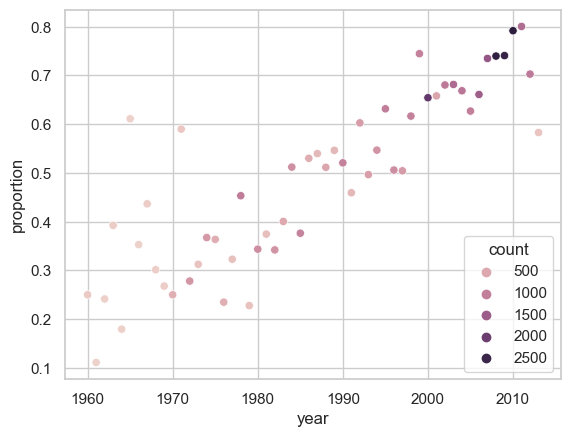

In [266]:

# Count rows with the same construction_year
construction_year_counts = pd.DataFrame(df['construction_year'].value_counts(), index=None)
construction_year_counts.columns = ['count']


# Show distribution of all classes in status_group column for each construction year
for year in construction_year_counts.index:
    construction_year_counts.loc[construction_year_counts.index == year, 'func_counts'] = len(df[(df['construction_year'] == year) & (df['status_group'] == 'functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'nonfunc_counts'] = len(df[(df['construction_year'] == year) & (df['status_group'] == 'non functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'proportion'] = construction_year_counts['func_counts']/(construction_year_counts['func_counts']+construction_year_counts['nonfunc_counts'])

# print(construction_year_counts)
# add a column of incremental index
construction_year_counts.reset_index(drop=False, inplace=True)
construction_year_counts.rename(index=str, columns={'index': 'year'}, inplace=True)

construction_year_counts.drop(index='0', inplace=True)
construction_year_counts

construction_year_counts.sort_values(by=['year'])
sns.scatterplot(construction_year_counts, x='year', y='proportion', hue='count')


AttributeError: 'AxesSubplot' object has no attribute '_legend'

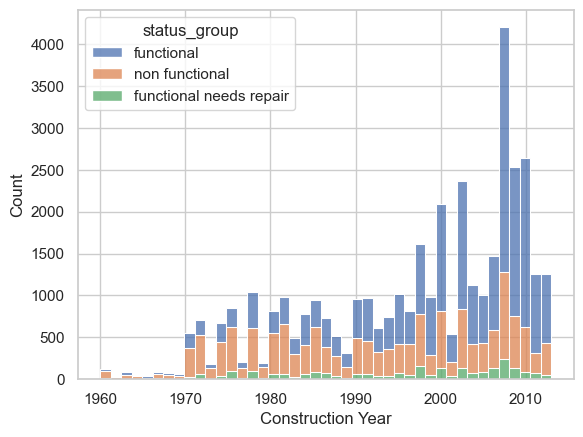

In [267]:
figure = sns.histplot(data=df[df['construction_year'] != 0], x='construction_year', hue='status_group', fill='True', multiple='stack')
plt.xlabel('Construction Year')
# figure._legend.set_title('Species')

<AxesSubplot: xlabel='construction_year', ylabel='status_group'>

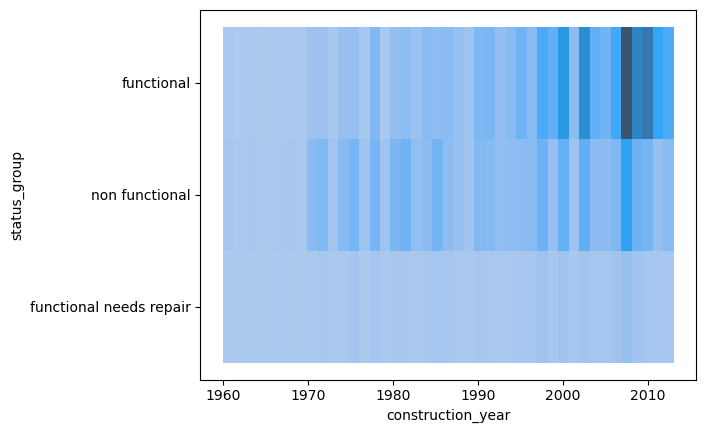

In [ ]:
sns.histplot(data=df[df['construction_year'] != 0], x='construction_year', y='status_group')